# Reto: Predicción del Costo del Seguro Médico

En este ejercicio, utilizarás un modelo de **regresión lineal** para predecir el costo del seguro médico de diferentes individuos basado en sus características personales. El conjunto de datos que usarás se encuentra disponible en Kaggle y ya está limpio, lo que te permitirá enfocarte en el análisis y el desarrollo del modelo.

---

## Descripción del conjunto de datos

El conjunto de datos incluye las siguientes columnas:

- **age**: Edad del individuo (en años).
- **sex**: Género del individuo (`male` o `female`).
- **bmi**: Índice de Masa Corporal (IMC).
- **children**: Número de hijos cubiertos por el seguro.
- **smoker**: Si el individuo es fumador (`yes` o `no`).
- **region**: Región donde vive el individuo (`northeast`, `northwest`, `southeast`, `southwest`).
- **charges**: Costo del seguro médico (variable objetivo a predecir).

---

## Objetivo

Entrenar un modelo de regresión lineal que prediga el costo del seguro médico (**`charges`**) utilizando las características proporcionadas en el conjunto de datos.

---

## Tareas

### 1. Cargar y explorar el conjunto de datos
1. Descarga el conjunto de datos desde [este enlace](https://www.kaggle.com/datasets/mirichoi0218/insurance) y cárgalo en un marco de datos Pandas.
2. Inspecciona las primeras filas del conjunto de datos.
3. Verifica que no haya valores faltantes ni inconsistencias.

### 2. Dividir los datos
1. Separa las columnas en:
   - **Variables predictoras** (`age`, `sex`, `bmi`, `children`, `smoker`, `region`).
   - **Variable objetivo** (`charges`).
2. Realiza una codificación adecuada de las variables categóricas (`sex`, `smoker`, `region`) utilizando técnicas como `pd.get_dummies()` o `OneHotEncoder`.
3. Divide los datos en conjuntos de entrenamiento (80%) y prueba (20%) utilizando `train_test_split` de Scikit-learn.

### 3. Entrenar el modelo
1. Importa la clase `LinearRegression` de Scikit-learn.
2. Ajusta el modelo a los datos de entrenamiento.
3. Imprime el intercepto y los coeficientes del modelo.

### 4. Evaluar el modelo
1. Calcula la puntuación R² en el conjunto de entrenamiento y prueba.
2. Genera una lista de las características más influyentes basándote en los coeficientes del modelo.

### 5. Interpretar los resultados
1. Discute qué variables parecen tener un mayor impacto en el costo del seguro.
2. ¿Qué tan bien se desempeña el modelo en general?


¡Buena suerte! 🚀


### 1. Cargar y explorar el conjunto de datos
1. Descarga el conjunto de datos desde [este enlace](https://www.kaggle.com/datasets/mirichoi0218/insurance) y cárgalo en un marco de datos Pandas.
2. Inspecciona las primeras filas del conjunto de datos.
3. Verifica que no haya valores faltantes ni inconsistencias.

In [1]:
import pandas as pd
data = pd.read_csv("../insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
#  Se puede observar que no hay datos nulos o NaN
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### 2. Dividir los datos
1. Separa las columnas en:
   - **Variables predictoras** (`age`, `sex`, `bmi`, `children`, `smoker`, `region`).
   - **Variable objetivo** (`charges`).
2. Realiza una codificación adecuada de las variables categóricas (`sex`, `smoker`, `region`) utilizando técnicas como `pd.get_dummies()` o `OneHotEncoder`.
3. Divide los datos en conjuntos de entrenamiento (80%) y prueba (20%) utilizando `train_test_split` de Scikit-learn.

In [5]:
random_state = 42

In [6]:
# 2. Separar las variables predictoras (X) y la variable de respuesta (y)
X = data[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
y = data['charges']

In [7]:
X

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest
1334,18,female,31.920,0,no,northeast
1335,18,female,36.850,0,no,southeast
1336,21,female,25.800,0,no,southwest


In [8]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [9]:
# One-hot encode categorical variables
X_encoded = pd.get_dummies(X, columns=['sex', 'smoker', 'region'], drop_first=False).astype(int)
X_encoded.drop(columns=['sex_female', 'smoker_no'], inplace=True)
X_encoded

,age,bmi,children,sex_male,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27,0,0,1,0,0,0,1
1,18,33,1,1,0,0,0,1,0
2,28,33,3,1,0,0,0,1,0
3,33,22,0,1,0,0,1,0,0
4,32,28,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30,3,1,0,0,1,0,0
1334,18,31,0,0,0,1,0,0,0
1335,18,36,0,0,0,0,0,1,0
1336,21,25,0,0,0,0,0,0,1


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=random_state)

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Verificar las formas de los conjuntos de datos
print("Tamaño del conjunto de entrenamiento (X_train_scaled, y_train):", X_train_scaled.shape, y_train.shape)
print("Tamaño del conjunto de prueba (X_test_scaled, y_test):", X_test_scaled.shape, y_test.shape)

Tamaño del conjunto de entrenamiento (X_train_scaled, y_train): (1070, 9) (1070,)
Tamaño del conjunto de prueba (X_test_scaled, y_test): (268, 9) (268,)


In [11]:
X_encoded

,age,bmi,children,sex_male,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27,0,0,1,0,0,0,1
1,18,33,1,1,0,0,0,1,0
2,28,33,3,1,0,0,0,1,0
3,33,22,0,1,0,0,1,0,0
4,32,28,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30,3,1,0,0,1,0,0
1334,18,31,0,0,0,1,0,0,0
1335,18,36,0,0,0,0,0,1,0
1336,21,25,0,0,0,0,0,0,1


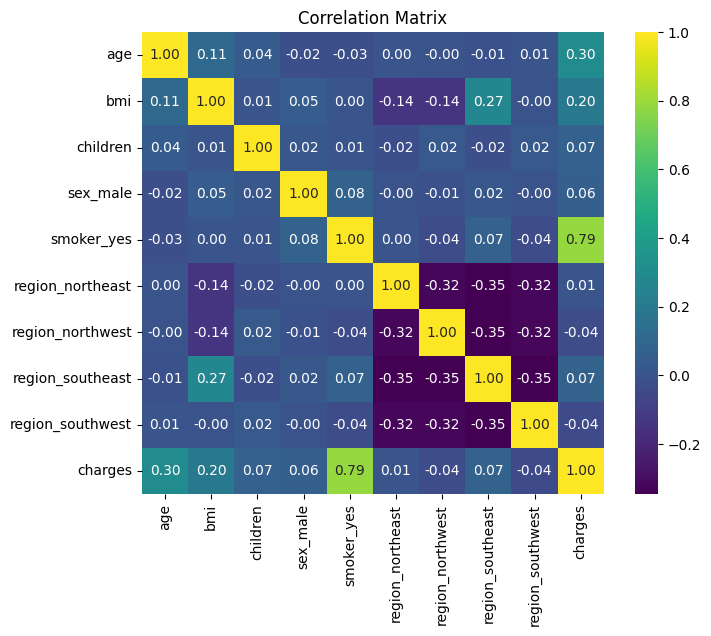

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Matriz de correlación para ver las relaciones entre variables
correlation_matrix = pd.concat([X_encoded, y], axis=1).corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', square=True, cmap='viridis')
plt.title('Correlation Matrix')
plt.show()

### 3. Entrenar el modelo
1. Importa la clase `LinearRegression` de Scikit-learn.
2. Ajusta el modelo a los datos de entrenamiento.
3. Imprime el intercepto y los coeficientes del modelo.

In [13]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [14]:
model.fit(X_train_scaled, y_train)

LinearRegression()

In [15]:
X_columns = X_encoded.columns.tolist()
X_columns

['age',
 'bmi',
 'children',
 'sex_male',
 'smoker_yes',
 'region_northeast',
 'region_northwest',
 'region_southeast',
 'region_southwest']

In [16]:
dict_coefs_by_col = {col: coef for col, coef in zip(X_columns, model.coef_)}
dict_coefs_by_col

{'age': np.float64(3613.4340152425143),
 'bmi': np.float64(2018.2281979972845),
 'children': np.float64(498.43112627833625),
 'sex_male': np.float64(0.16257395083133552),
 'smoker_yes': np.float64(9526.620904443582),
 'region_northeast': np.float64(9.13176815640417e+16),
 'region_northwest': np.float64(9.002718248725467e+16),
 'region_southeast': np.float64(9.307264526912149e+16),
 'region_southwest': np.float64(9.097267347626122e+16)}

In [17]:
print(f'Intercepto: {model.intercept_}')
print('\nCoeficientes:')
dict_coefs_by_col

Intercepto: 13345.203615806753

Coeficientes:


{'age': np.float64(3613.4340152425143),
 'bmi': np.float64(2018.2281979972845),
 'children': np.float64(498.43112627833625),
 'sex_male': np.float64(0.16257395083133552),
 'smoker_yes': np.float64(9526.620904443582),
 'region_northeast': np.float64(9.13176815640417e+16),
 'region_northwest': np.float64(9.002718248725467e+16),
 'region_southeast': np.float64(9.307264526912149e+16),
 'region_southwest': np.float64(9.097267347626122e+16)}

### 4. Evaluar el modelo
1. Calcula la puntuación R² en el conjunto de entrenamiento y prueba.
2. Genera una lista de las características más influyentes basándote en los coeficientes del modelo.

In [18]:
from sklearn.metrics import r2_score

# Make prediction
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Compute Score
print(f'Train R^2 Score: {r2_score(y_train, y_train_pred)}')
print(f'Test R^2 Score: {r2_score(y_test, y_test_pred)}\n')

Train R^2 Score: 0.7415943510873793
Test R^2 Score: 0.7832563169554252



In [19]:
# Obtener los coeficientes del modelo
coeficientes = model.coef_

# Crear un DataFrame con los coeficientes y las características
coef_df = pd.DataFrame({
    'feature': X_encoded.columns,
    'coef': coeficientes
})

# Ordenar por el valor absoluto del coeficiente
coef_df['abs_coef'] = coef_df['coef'].abs()
coef_df_sorted = coef_df.sort_values(by='abs_coef', ascending=False)
coef_df_sorted

,feature,coef,abs_coef
7,region_southeast,9.307265e+16,9.307265e+16
5,region_northeast,9.131768e+16,9.131768e+16
8,region_southwest,9.097267e+16,9.097267e+16
6,region_northwest,9.002718e+16,9.002718e+16
4,smoker_yes,9.526621e+03,9.526621e+03
0,age,3.613434e+03,3.613434e+03
1,bmi,2.018228e+03,2.018228e+03
2,children,4.984311e+02,4.984311e+02
3,sex_male,1.625740e-01,1.625740e-01


Text(0.5, 1.0, 'Coefficients Values by Feature')

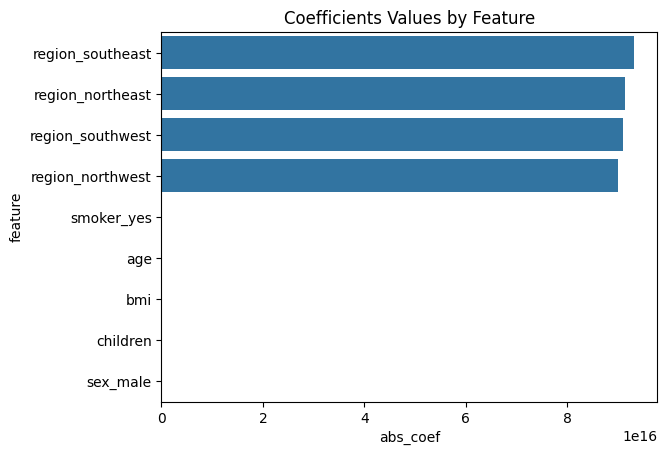

In [20]:
sns.barplot(data=coef_df_sorted, x='abs_coef', y='feature')
plt.title("Coefficients Values by Feature")


### 5. Interpretar los resultados
1. Discute qué variables parecen tener un mayor impacto en el costo del seguro.
2. ¿Qué tan bien se desempeña el modelo en general?

